# Evaluation
This notebook is for inspecting the data and produce the desired results. It will use dataframes to do so.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import networkx as nx
import sys, os, csv, re, matplotlib
import numpy as np
from scipy import stats
os.chdir("..")

import src.parse as parse
from src.plot import plot_all, automatic_plotting
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [2]:
# files = [file.rstrip(".vrp") for file in os.listdir("Instances/Uchoa") if (not file.endswith("sol"))]

methods = ["SPPRC","cyc2","ng8","ng20"]

In [240]:
dfs = {}
columns = ["ID",'instance','method','terminated','n',"K",'total time','sol_val']
finished_columns = ['final bound',"elementary","cyc2"]
data = pd.DataFrame(columns=columns + finished_columns)
pattern = r"(X-n(\d+)-k(\d+))-(\w+)\.log"
for i, log in enumerate((log for log in os.listdir("output_uchoa"))):
    ID = log.strip(".log")
    instance, n, K, method = re.search(pattern, log).groups()
    log = f"output_uchoa/{log}"
    finished = parse.log_finished(log)
    sol_val = parse.parse_sol_val(instance)
    if finished:
        elementary, cyc2 = parse.parse_footer(log)
    
    df = parse.parse_output(log)
    df["total time"] = df["total time"].cumsum()
    df = df[df.method == method]
    dfs[f'{instance}-{method}'] = df
    if finished:
        data = pd.concat((data,pd.DataFrame([[ID, instance,method, finished,n,K, df['total time'].iloc[-1], sol_val, df['upper_bound'].iloc[-1], elementary, cyc2]],columns=columns+finished_columns)))
    else:
        data = pd.concat((data,pd.DataFrame([[ID, instance,method, finished,n,K, df['total time'].iloc[-1], sol_val]],columns=columns)))
data = data.set_index("ID")
data['n'] = data['n'].astype(int)
data['total time'] = data['total time'].astype(float)
data['n/K'] = data['n'].astype(float) / data['K'].astype(float)
data['lb/I'] = data['final bound'].astype(float) / data['sol_val'].astype(float)

In [6]:
data.loc[(data.terminated == True) & (data.elementary == True)]

,instance,method,terminated,n,K,total time,sol_val,final bound,elementary,cyc2,n/K,lb/I
ID,,,,,,,,,,,,
X-n219-k73-ng8,X-n219-k73,ng8,True,219,73,0.2,117595,117208.0,True,True,3.000000,0.996709
X-n219-k73-ng20,X-n219-k73,ng20,True,219,73,0.5,117595,117208.0,True,True,3.000000,0.996709
X-n376-k94-ng20,X-n376-k94,ng20,True,376,94,172.2,147713,147298.8032,True,True,4.000000,0.997196
X-n219-k73-cyc2,X-n219-k73,cyc2,True,219,73,0.0,117595,117208.0,True,True,3.000000,0.996709
X-n195-k51-ng20,X-n195-k51,ng20,True,195,51,83.2,44225,43837.0518,True,True,3.823529,0.991228


In [43]:
df1 = data.loc[(data.terminated == True) & (data.cyc2 == False) & (data.method == 'ng20')].copy()
df2 = data.loc[((data.terminated == True) & (data.cyc2 == True) & (data.method == 'ng20'))].copy()
df1

,instance,method,terminated,n,K,total time,sol_val,final bound,elementary,cyc2,n/K,lb/I
ID,,,,,,,,,,,,
X-n247-k50-ng20,X-n247-k50,ng20,True,247,50,36363.3,37274,37196.5655,False,False,4.940000,0.997923
X-n420-k130-ng20,X-n420-k130,ng20,True,420,130,21.5,107798,107317.9312,False,False,3.230769,0.995547
X-n172-k51-ng20,X-n172-k51,ng20,True,172,51,7611.0,45607,45271.2937,False,False,3.372549,0.992639
X-n313-k71-ng20,X-n313-k71,ng20,True,313,71,62141.6,94043,93600.1723,False,False,4.408451,0.995291
X-n469-k138-ng20,X-n469-k138,ng20,True,469,138,64.2,221824,221055.125,False,False,3.398551,0.996534
X-n289-k60-ng20,X-n289-k60,ng20,True,289,60,40682.3,95151,94696.8342,False,False,4.816667,0.995227


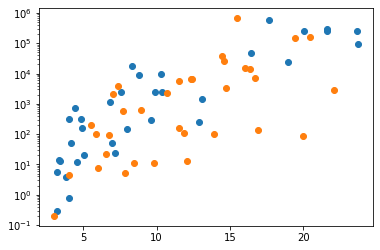

(33.40952380952381, 0.021551768535407655, 19, array([[2.5, 3. , 2. , 3.5, 3. , 1. , 2.5, 1. , 1.5, 0.5, 1. , 1.5, 1.5,
        1. , 1.5, 0.5, 3. , 1. , 1.5, 1. ],
       [2.5, 3. , 2. , 3.5, 3. , 1. , 2.5, 1. , 1.5, 0.5, 1. , 1.5, 1.5,
        1. , 1.5, 0.5, 3. , 1. , 1.5, 1. ]]))


34

In [47]:
df1 = data.loc[(data.terminated == True) & (data.cyc2 == False) & (data.method == 'ng8')].copy()
df2 = data.loc[((data.terminated == True) & (data.cyc2 == True) & (data.method == 'ng8'))].copy()
plt.scatter(df1['n/K'],df1['total time'])
plt.scatter(df2['n/K'],df2['total time'])
plt.yscale('log')
plt.show()

df1['buckets'] = df1['n'] // 50 * 50
df2['buckets'] = df2['n'] // 50 * 50
df1 = df1.round()
df2 = df2.round()
freq1 = df1.groupby('n/K').count()['instance']
freq2 = df2.groupby('n/K').count()['instance']

arr = pd.DataFrame((freq1,freq2)).fillna(0).to_numpy()
print(stats.chi2_contingency(arr))
df1.shape[0]
# Zusammenhang zu n und n/K bereits verworfen.
# Gibt es hier einen Zusammenhang zur Laufzeit?
# lb/I: p-value > 0.5
# n: p-value > 0.5

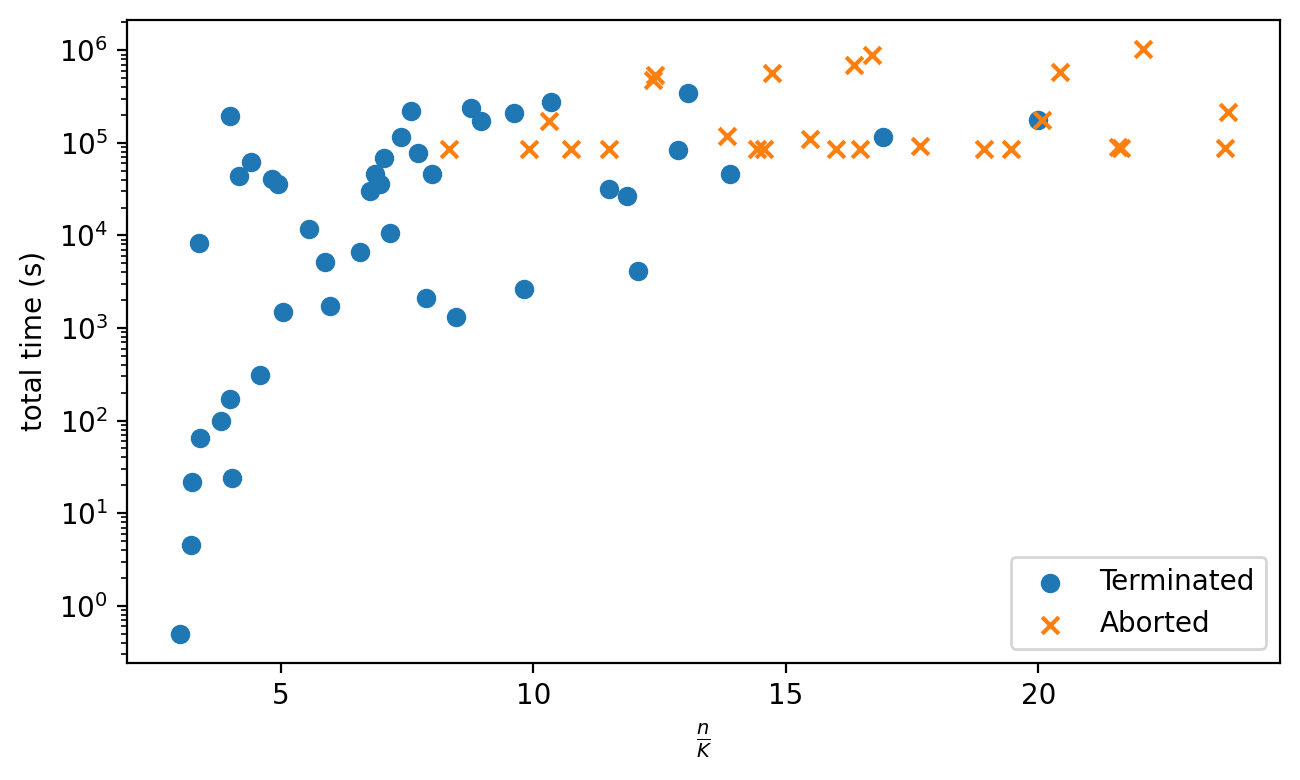

In [4]:
df = data.loc[data.method == "ng20"].copy()
df1 = df.loc[df.terminated == True]
df2 = df.loc[df.terminated == False]
plt.figure(figsize=(6.6,4),dpi=200)
plt.scatter(df1['n/K'],df1['total time'],label="Terminated")
plt.scatter(df2['n/K'],df2['total time'],label="Aborted",marker='x')
plt.xlabel(r"$\frac{n}{K}$")
plt.ylabel("total time (s)")
plt.yscale('log')
plt.legend()
plt.tight_layout()
# plt.show()
plt.savefig("plots/termination.pgf")
#TODO: Hier vier Subplots machen, die jeweils die Laufzeiten angeben für die vier Methoden

In [5]:
df = data.loc[data.method == "ng20"].copy()
df['buckets'] = (df['n'] / 50).round(0)
df1 = df.loc[df.terminated == True]
df2 = df.loc[df.terminated == False]
freq1 = df1.groupby('buckets').count()['instance']
freq2 = df2.groupby('buckets').count()['instance']

arr = pd.DataFrame((freq1,freq2)).fillna(0).to_numpy()
stats.chi2_contingency(arr)

(5.177845410403549,
 0.7384096799472049,
 8,
 array([[3.73913043, 6.23188406, 6.85507246, 6.23188406, 6.85507246,
         4.36231884, 3.73913043, 3.11594203, 1.86956522],
        [2.26086957, 3.76811594, 4.14492754, 3.76811594, 4.14492754,
         2.63768116, 2.26086957, 1.88405797, 1.13043478]]))

In [6]:
df = data.loc[data.method == "ng20"].copy()
df['n/K'] = (df['n/K']).astype(int)
df1 = df.loc[df.terminated == True]
df2 = df.loc[df.terminated == False]
freq1 = df1.groupby('n/K').count()['instance']
freq2 = df2.groupby('n/K').count()['instance']

arr = pd.DataFrame((freq1,freq2)).fillna(0).to_numpy()
arr
stats.chi2_contingency(arr)

(43.73291592128801,
 0.0016338770266359835,
 20,
 array([[3.73913043, 4.98550725, 2.49275362, 2.49275362, 3.73913043,
         3.11594203, 1.86956522, 1.86956522, 1.86956522, 2.49275362,
         1.86956522, 3.11594203, 1.86956522, 1.86956522, 0.62318841,
         0.62318841, 0.62318841, 0.62318841, 1.24637681, 0.62318841,
         1.24637681],
        [2.26086957, 3.01449275, 1.50724638, 1.50724638, 2.26086957,
         1.88405797, 1.13043478, 1.13043478, 1.13043478, 1.50724638,
         1.13043478, 1.88405797, 1.13043478, 1.13043478, 0.37681159,
         0.37681159, 0.37681159, 0.37681159, 0.75362319, 0.37681159,
         0.75362319]]))

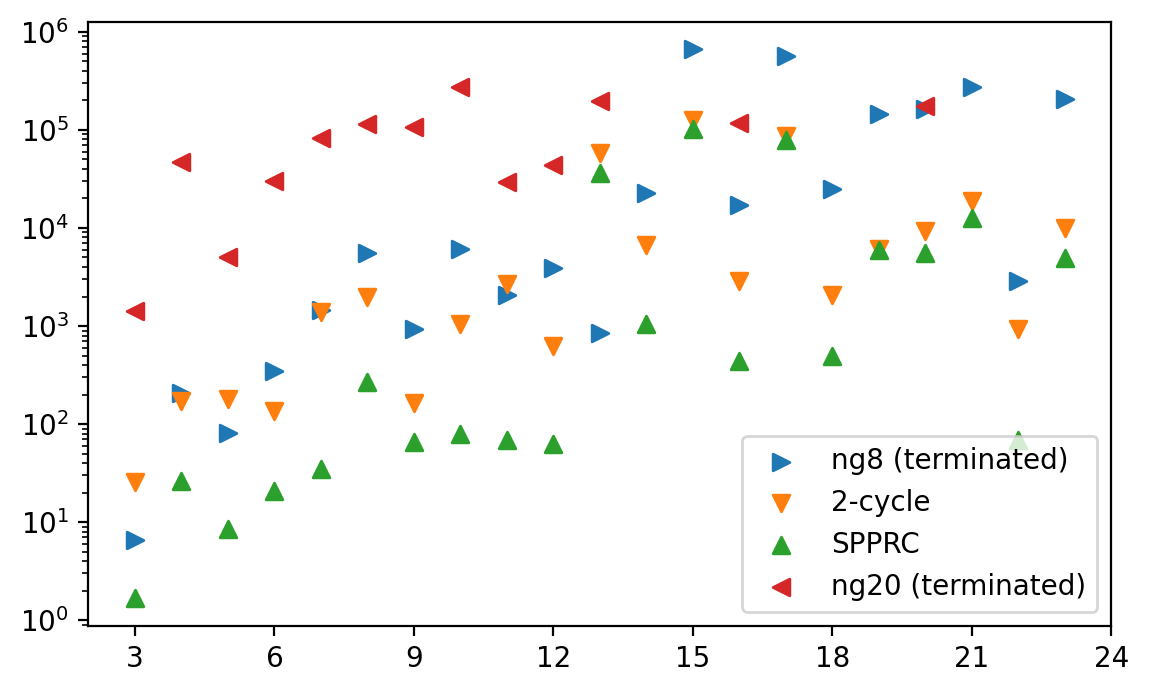

In [7]:
data['n/K'] = data['n/K'].astype(int)
data
plt.figure(figsize=(6.6,4),dpi=200)
df = data.loc[data.method == "ng8"]
df1 = df.loc[df.terminated == True].groupby('n/K').mean()
df2 = df.loc[df.terminated == False].groupby('n/K').mean()
plt.scatter(df1.index,df1['total time'],marker='>',label='ng8 (terminated)')
# plt.scatter(df2.index,df2['total time'],marker='o')
df3 = data.loc[data.method == "cyc2"].groupby('n/K').mean()
plt.scatter(df3.index,df3['total time'],marker='v',label='2-cycle')
df4 = data.loc[data.method == "SPPRC"].groupby('n/K').mean()
plt.scatter(df4.index,df4['total time'],marker='^',label='SPPRC')
plt.yscale('log')

df = data.loc[data.method == "ng20"].copy()
df1 = df.loc[df.terminated == True].groupby('n/K').mean()
df2 = df.loc[df.terminated == False].groupby('n/K').mean()
plt.scatter(df1.index,df1['total time'],label="ng20 (terminated)",marker='<')
# plt.scatter(df2.index,df2['total time'],label="Aborted",marker='x')

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(loc='lower right')

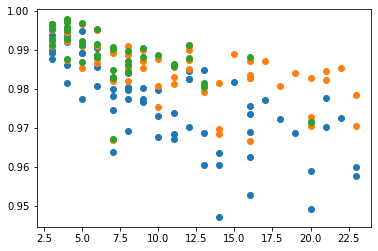

In [8]:
# Die Bound Qualität scheint zu sinken, je höher n/K ist.
df1 = data[data.method == "cyc2"]
df2 = data[data.method == "ng8"]
df3 = data[data.method == "ng20"]
plt.scatter(df1["n/K"],df1['lb/I'])
plt.scatter(df2["n/K"],df2['lb/I'])
plt.scatter(df3["n/K"],df3['lb/I'])
plt.show()

In [9]:
data.loc[(data.method == "ng20") & (data.terminated == False)]

,instance,method,terminated,n,K,total time,sol_val,final bound,n/K,lb/I
ID,,,,,,,,,,
X-n284-k15-ng20,X-n284-k15,ng20,False,284,15,86702.1,20226\n,NaN,18,NaN
X-n256-k16-ng20,X-n256-k16,ng20,False,256,16,86471.9,18839\n,NaN,16,NaN
X-n167-k10-ng20,X-n167-k10,ng20,False,167,10,881888.6,20557\n,NaN,16,NaN
X-n233-k16-ng20,X-n233-k16,ng20,False,233,16,86570.7,19230\n,NaN,14,NaN
X-n367-k17-ng20,X-n367-k17,ng20,False,367,17,90707.5,22814\n,NaN,21,NaN
X-n331-k15-ng20,X-n331-k15,ng20,False,331,15,1027720.9,31102\n,NaN,22,NaN
X-n449-k29-ng20,X-n449-k29,ng20,False,449,29,109982.8,55233\n,NaN,15,NaN
X-n190-k8-ng20,X-n190-k8,ng20,False,190,8,218124.6,16980\n,NaN,23,NaN
X-n459-k26-ng20,X-n459-k26,ng20,False,459,26,92471.5,24139\n,NaN,17,NaN


## Create Relative data to other methods

In [37]:
hierarchy = {"ng20":"ng8","ng8":"cyc2","cyc2":"SPPRC"}

c = 0.99

data['I'] = np.nan 
data['t'] = np.nan
data['lb_rel'] = np.nan
data['time_beaten'] = False

for index, row in data.iterrows():
    if row['terminated']:
        df = dfs[index]
        if row['method'] in hierarchy.keys():
            instance = row["instance"]
            method = row["method"]
            bound_sup = data['final bound'][f"{instance}-{hierarchy[method]}"]
            time_sup = data['total time'][f"{instance}-{hierarchy[method]}"]
            bound_c = row['final bound'] * c
            df_beaten = df[df['lower_bound'] >= bound_sup]
            df_c = df[df['lower_bound'] >= bound_c]
            
            data.loc[index,'lb_rel'] = bound_sup / row['final bound']
            data.loc[index, 'I'] = df_beaten.shape[0] - 1
            data.loc[index, 't'] = df_beaten['total time'].iloc[-1] - df_beaten.iloc[0,df_beaten.columns.get_loc('total time')]
            
            data.loc[index, 'Ic'] = df_c.shape[0] - 1
            data.loc[index, 'tc'] = df_c['total time'].iloc[-1] - df_c.iloc[0,df_c.columns.get_loc('total time')]
            
            if row['total time'] < time_sup:
                data.loc[index, 'time_beaten'] = True
    
data["t/I"] = data['t'] / (data["I"])
data["%"] = data['t'].divide(data['total time'],fill_value=np.nan)
data["%c"] = data['tc'].divide(data['total time'],fill_value=np.nan)
data["tt"] = data['total time']
data = data.round({"total time":0, "t":0,"tc":0, "%":2,"%c":2,"t/I":0})
# data[(data.method == "ng20") &(data.terminated == True)].sort_values("n/K")

In [38]:
print(data[(data.method == "ng20") &(data.I == 0) & (data.terminated == True)].shape[0])
data[(data.method == 'ng20')& (data.terminated == True)].shape[0]

28


43

TODO: Wie wäre es sich hier noch anzuschauen, was Signale zum erkennen von Tailing Off sind? An der Stelle könnte ich mir die Bounds anschauen.

### Table grouped by n/K

In [39]:
table = data[['instance','method','I','t','tt',"%","t/I","n/K","%c","Ic"]]
table = table[table.method != "SPPRC"]
# table = table[table.method == "ng8"]
table["n/K"] = table["n/K"].astype(int)
table["%"] = (table["%"]*100)
table = table.groupby(["n/K","method"]).mean().unstack('method')
table.columns = table.columns.swaplevel()
_, index = table.columns.sortlevel()
table = table.iloc[:,index]
# ser = table[("","n/K")]
table = table[['cyc2','ng8','ng20']]
# table.style.format("{:.0f}")

## Comparison to relaxations

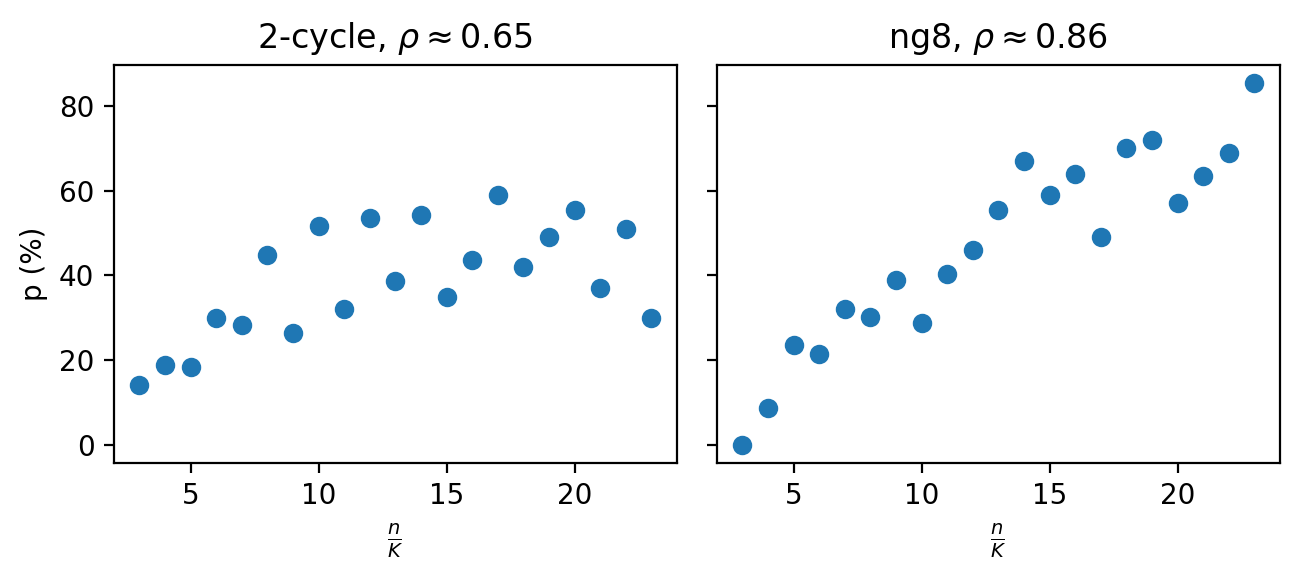

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax1.scatter(table.index,table['cyc2',"%"])
ax1.set_title(r"2-cycle, $\rho \approx 0.65$")
ax1.set_xlabel(r"$\frac {n} {K}$")
ax2.scatter(table.index,table['ng8',"%"])
ax2.set_title(r"ng8, $\rho \approx 0.86$")
ax2.set_xlabel(r"$\frac {n} {K}$")
ax1.set_ylabel(r"p (%)")
plt.tight_layout()
plt.savefig("plots/percentage_flexibility.pgf")
plt.show()

SpearmanrResult(correlation=0.8601351145772836, pvalue=1.0)
SpearmanrResult(correlation=0.6511175469943532, pvalue=0.99999999908246)
SpearmanrResult(correlation=0.9393131892358529, pvalue=1.0)
SpearmanrResult(correlation=0.9552050856635188, pvalue=1.0)


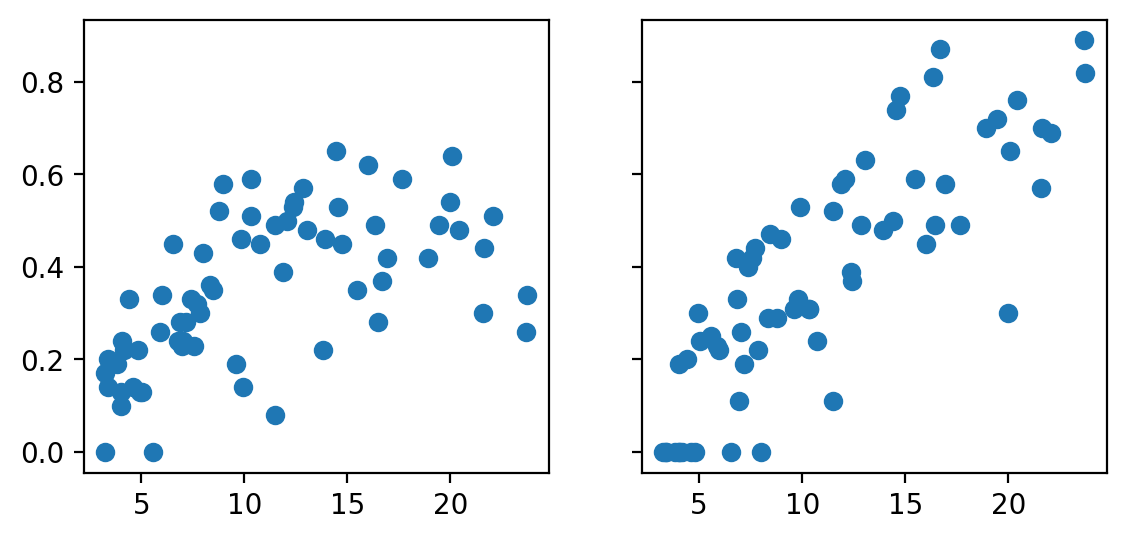

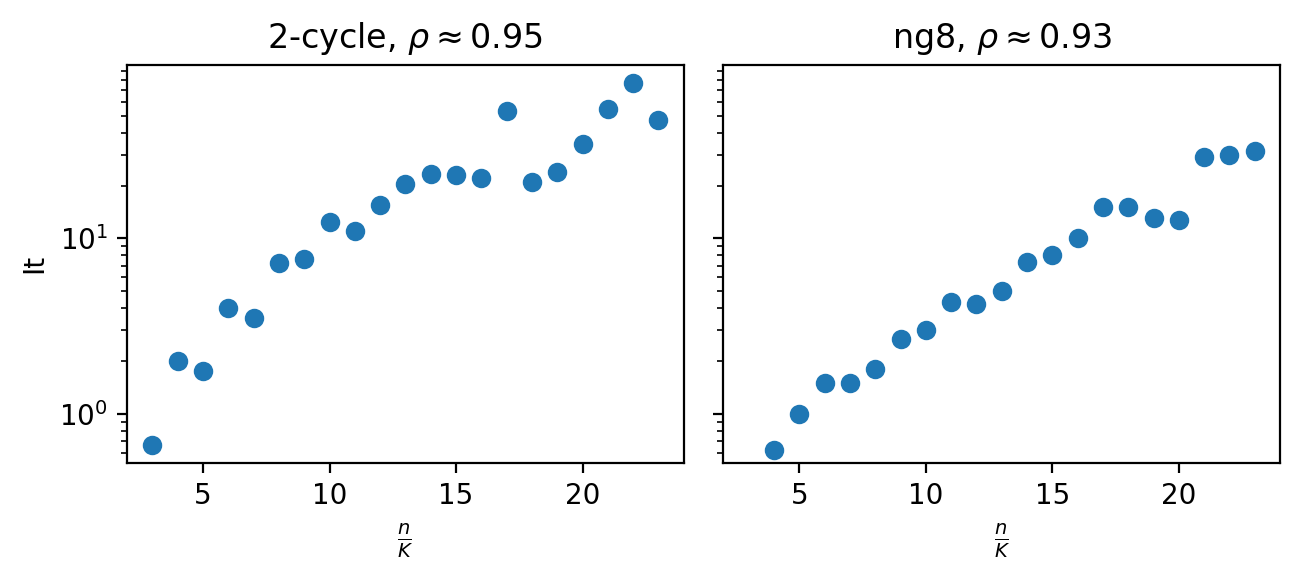

In [76]:
# Die Streuung scheint unterschiedlich groß zu sein! Bei n8 etwas kleiner, ber cyc2 deutlich größer
subset1 = data[data.method == "ng8"]
subset2 = data[data.method == "cyc2"]

print(stats.spearmanr(subset1[["n/K",'%']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset2[["n/K",'%']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset1[["n/K",'I']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset2[["n/K",'I']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))

# fig, axs = plt.subplots(2, 2,sharey=True,figsize=(6.6,6),dpi=200)
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax2.scatter(subset1["n/K"],subset1["%"])
ax1.scatter(subset2["n/K"],subset2["%"])
plt.show()
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax1.scatter(table.index,table['cyc2',"I"])
ax1.set_yscale("log")
ax1.set_title(r"2-cycle, $\rho \approx 0.95$")
ax1.set_xlabel(r"$\frac {n} {K}$")
ax1.set_ylabel("It")
ax2.set_title(r"ng8, $\rho \approx 0.93$")
ax2.scatter(table.index,table['ng8',"I"])
ax2.set_xlabel(r"$\frac {n} {K}$")
plt.tight_layout()
plt.savefig("plots/it_flexibility.pgf")
# plt.show()

## Reason for this behaviour

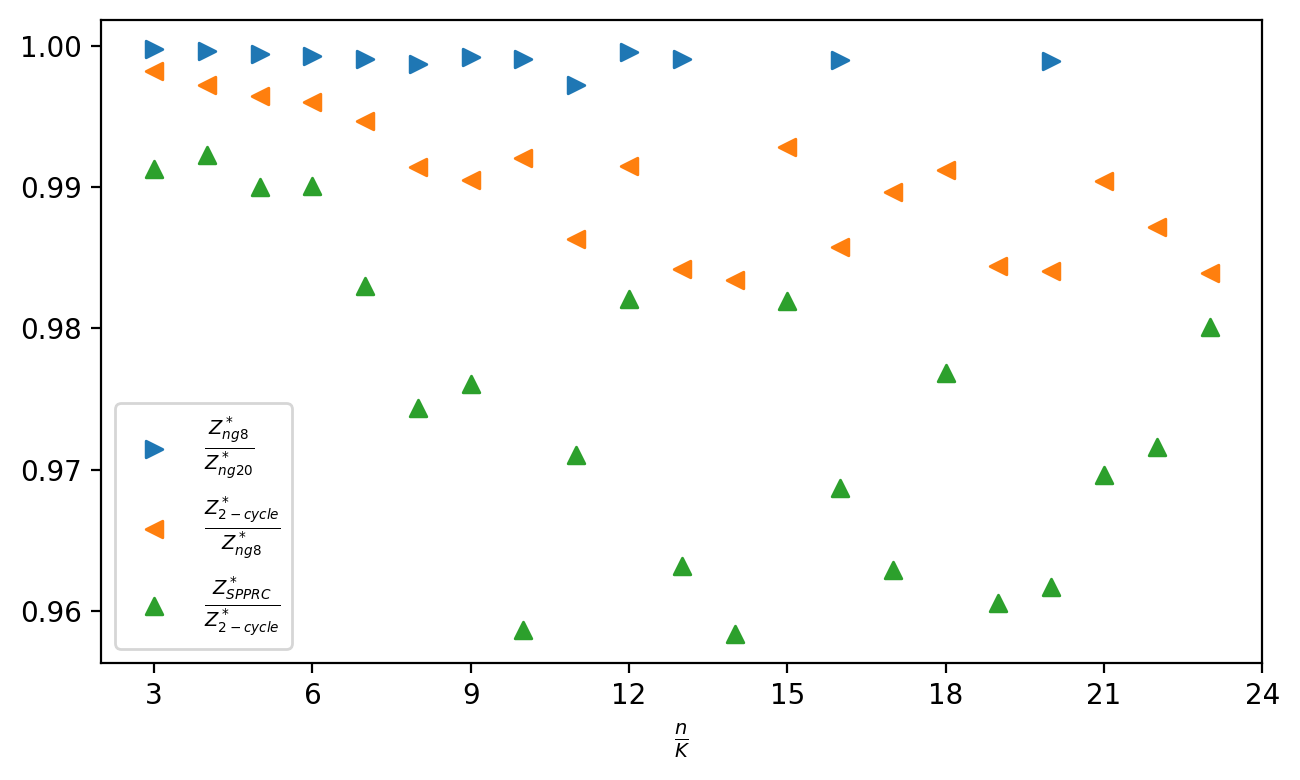

In [9]:
df = data.copy()
df["n/K"] = df["n/K"].astype(int)
df2 = df[df.method == 'ng8'].groupby("n/K").mean()
df1 = df[df.method == 'ng20'].groupby("n/K").mean()
df3 = df[df.method == 'cyc2'].groupby("n/K").mean()
plt.figure(figsize=(6.6,4),dpi=200)
plt.scatter(df1.index,df1['lb_rel'],marker='>',label=r"$\frac{Z^*_{ng8}}{Z^*_{ng20}}$")
plt.scatter(df2.index,df2['lb_rel'],marker="<",label=r"$\frac{Z^*_{2-cycle}}{Z^*_{ng8}}$")
plt.scatter(df3.index,df3['lb_rel'],marker='^',label=r"$\frac{Z^*_{SPPRC}}{Z^*_{2-cycle}}$")
plt.xlabel(r"$\frac{n}{K}$")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig("plots/lb_rel.pgf")

In [10]:
df = data.loc[data.method == "ng8"][["n/K","lb_rel"]]

print(stats.spearmanr(df.to_numpy(),axis=0, nan_policy="omit",alternative="less"))

df = df.loc[data['n/K'] >= 10]
print(stats.spearmanr(df.to_numpy(),axis=0, nan_policy="omit",alternative="less"))
# Dieser Test ist mir zu schwach. Ich lasse den Punkt aus.

SpearmanrResult(correlation=-0.8170175406599548, pvalue=9.828747448941058e-18)
SpearmanrResult(correlation=-0.2362753194782688, pvalue=0.09647136610381922)


## Create Table

In [57]:
table = data[['instance','method','I','t','tt',"%","n/K"]]
table = table[table.method != "SPPRC"]
table = table.pivot(index=["instance","n/K"],columns='method')
table = table.reset_index("n/K")
table.columns = table.columns.swaplevel()
_, index = table.columns.sortlevel()
table = table.iloc[:,index]
ser = table[("","n/K")]
table = table[['cyc2','ng8','ng20']]
table.insert(0,"n/K",ser)
format_dict = {("ng8","%"):"{:.0%}".format, ("ng20","%"):"{:.0%}".format, ("cyc2","%"):"{:.0%}".format}
table.iloc[:40].to_latex("output/table_small.tex",formatters=format_dict,float_format="%.0f",na_rep="-")
table.iloc[40:].to_latex("output/table_large.tex",formatters=format_dict,float_format="%.0f",na_rep="-")
table.style.format("{:.0f}")

/var/folders/tv/pzvp6rwx029b6p4rgqv2cx0h0000gn/T/ipykernel_35188/2480925792.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.iloc[:40].to_latex("output/table_small.tex",formatters=format_dict,float_format="%.0f",na_rep="-")
/var/folders/tv/pzvp6rwx029b6p4rgqv2cx0h0000gn/T/ipykernel_35188/2480925792.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.iloc[40:].to_latex("output/table_large.tex",formatters=format_dict,float_format="%.0f",na_rep="-")


## Against Tailing Off

In [67]:
hierarchy = {"ng20":"ng8","ng8":"cyc2","cyc2":"SPPRC"}

c = 0.9

data['I'] = np.nan 
data['t'] = np.nan
data['lb_rel'] = np.nan
data['time_beaten'] = False

for index, row in data.iterrows():
    if row['terminated']:
        df = dfs[index]
        if row['method'] in hierarchy.keys():
            instance = row["instance"]
            method = row["method"]
            bound_sup = data['final bound'][f"{instance}-{hierarchy[method]}"]
            time_sup = data['total time'][f"{instance}-{hierarchy[method]}"]
            bound_c = row['final bound'] * c
            df_beaten = df[df['lower_bound'] >= bound_sup]
            df_c = df[df['lower_bound'] >= bound_c]
            
            data.loc[index,'lb_rel'] = bound_sup / row['final bound']
            data.loc[index, 'I'] = df_beaten.shape[0] - 1
            data.loc[index, 't'] = df_beaten['total time'].iloc[-1] - df_beaten.iloc[0,df_beaten.columns.get_loc('total time')]
            
            data.loc[index, 'Ic'] = df_c.shape[0] - 1
            data.loc[index, 'tc'] = df_c['total time'].iloc[-1] - df_c.iloc[0,df_c.columns.get_loc('total time')]
            
            if row['total time'] < time_sup:
                data.loc[index, 'time_beaten'] = True
    
data["t/I"] = data['t'] / (data["I"])
data["%"] = data['t'].divide(data['total time'],fill_value=np.nan)
data["%c"] = data['tc'].divide(data['total time'],fill_value=np.nan)
data["tt"] = data['total time']
data = data.round({"total time":0, "t":0,"tc":0, "%":2,"%c":2,"t/I":0})
# data[(data.method == "ng20") &(data.terminated == True)].sort_values("n/K")

In [68]:
table = data[['instance','method','I','t','tt',"%","t/I","n/K","%c","Ic"]]
table = table[table.method != "SPPRC"]
# table = table[table.method == "ng8"]
table["n/K"] = table["n/K"].astype(int)
table["%"] = (table["%"]*100)
table = table.groupby(["n/K","method"]).mean().unstack('method')
table.columns = table.columns.swaplevel()
_, index = table.columns.sortlevel()
table = table.iloc[:,index]
# ser = table[("","n/K")]
table = table[['cyc2','ng8','ng20']]
# table.style.format("{:.0f}")

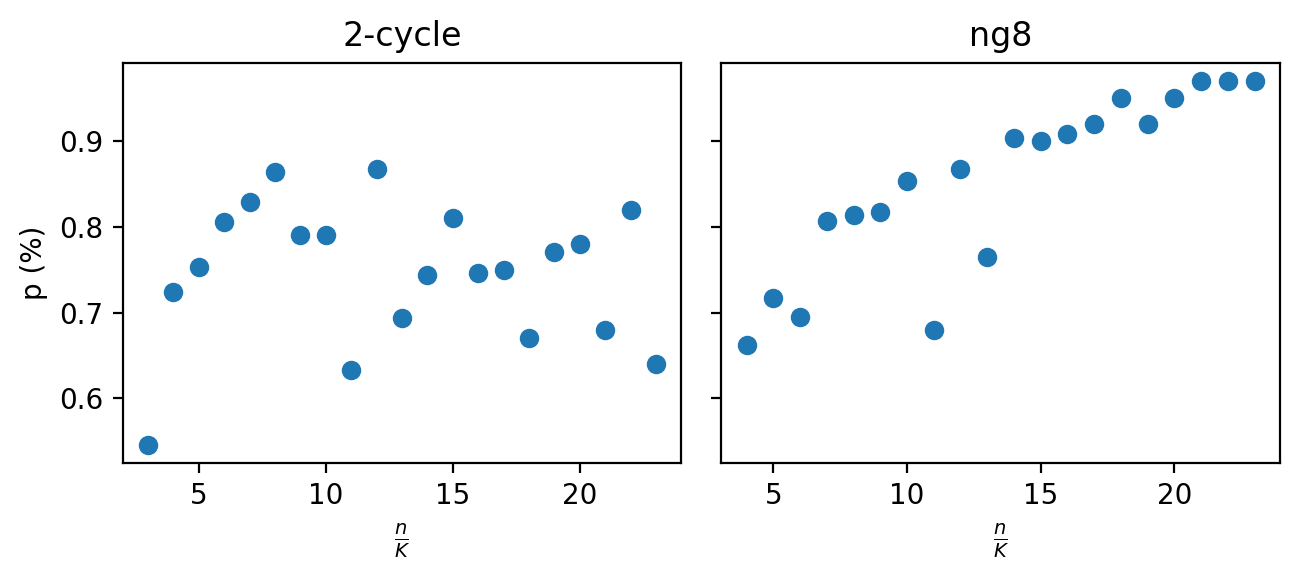

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax1.scatter(table.index,table['cyc2',"%c"])
ax1.set_title(r"2-cycle")
ax1.set_xlabel(r"$\frac {n} {K}$")
ax2.scatter(table.index,table['ng8',"%c"])
ax2.set_title(r"ng8")
ax2.set_xlabel(r"$\frac {n} {K}$")
ax1.set_ylabel(r"p (%)")
plt.tight_layout()
# plt.savefig("plots/percentage_flexibility.pgf")
plt.show()

SpearmanrResult(correlation=0.8138730320123729, pvalue=0.9999999999999999)
SpearmanrResult(correlation=0.0025879774514906313, pvalue=0.5083553857282379)
SpearmanrResult(correlation=0.9423365520337409, pvalue=1.0)
SpearmanrResult(correlation=0.9414203674049202, pvalue=1.0)


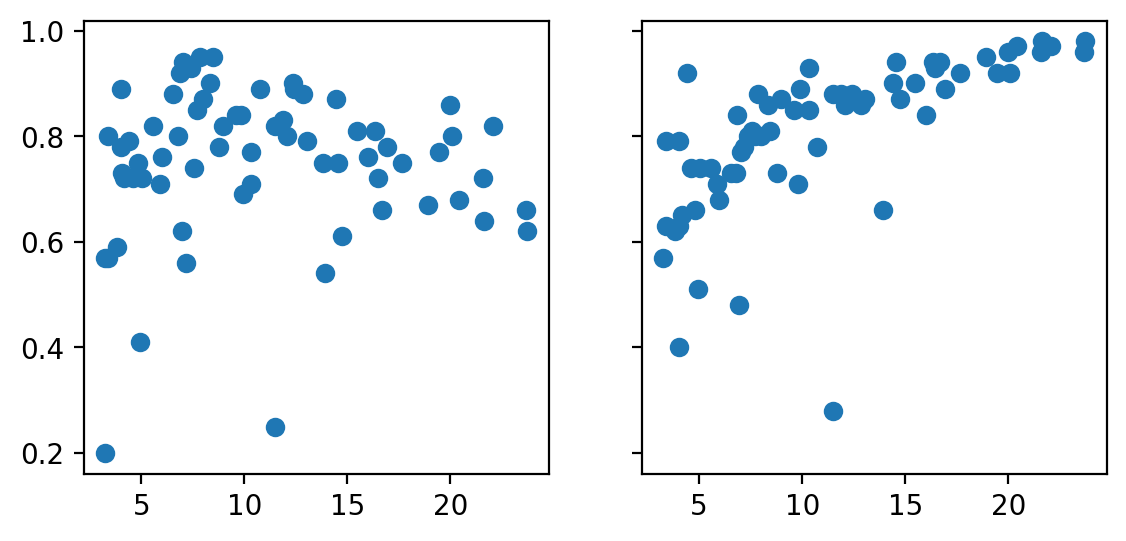

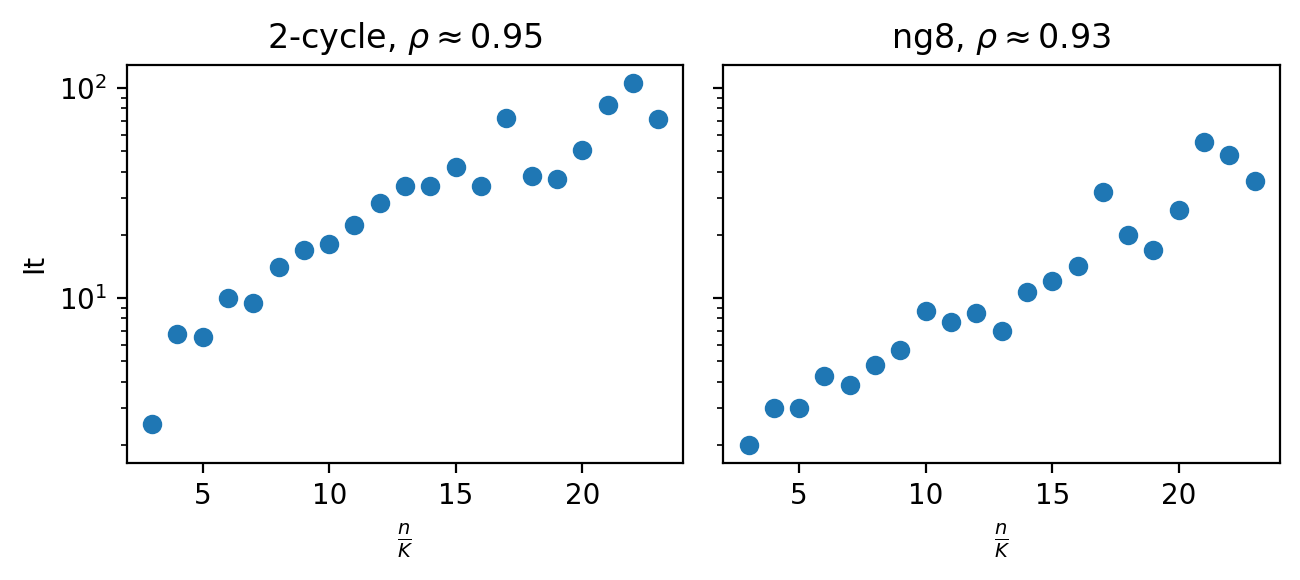

In [70]:
# Die Streuung scheint unterschiedlich groß zu sein! Bei n8 etwas kleiner, ber cyc2 deutlich größer
subset1 = data[data.method == "ng8"]
subset2 = data[data.method == "cyc2"]

print(stats.spearmanr(subset1[["n/K",'%c']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset2[["n/K",'%c']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset1[["n/K",'Ic']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset2[["n/K",'Ic']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))

# fig, axs = plt.subplots(2, 2,sharey=True,figsize=(6.6,6),dpi=200)
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax2.scatter(subset1["n/K"],subset1["%c"])
ax1.scatter(subset2["n/K"],subset2["%c"])
plt.show()
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax1.scatter(table.index,table['cyc2',"Ic"])
ax1.set_yscale("log")
ax1.set_title(r"2-cycle, $\rho \approx 0.95$")
ax1.set_xlabel(r"$\frac {n} {K}$")
ax1.set_ylabel("It")
ax2.set_title(r"ng8, $\rho \approx 0.93$")
ax2.scatter(table.index,table['ng8',"Ic"])
ax2.set_xlabel(r"$\frac {n} {K}$")
plt.tight_layout()
# plt.savefig("plots/it_flexibility.pgf")
# plt.show()
# Das ganze scheint ebenso für cyc2 und % zu gelten.
# Aber nicht für ng20!

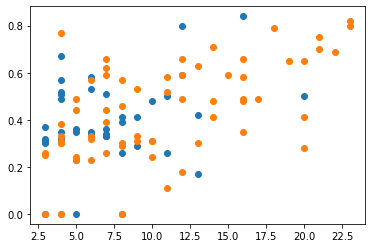

In [34]:
df = data.copy()
df["n/K"] = df["n/K"].astype(int)
df1 = df[df.method == 'ng20']
df2 = df[df.method == 'ng8']
plt.scatter(df1['n/K'],df1['%c'])
plt.scatter(df2['n/K'],df2['%c'])

In [241]:
methods = ["SPPRC","cyc2","ng8","ng20"]
data = data[['method','instance','terminated','sol_val','total time','n/K','final bound']]

method_names = ["SPPRC","2-cycle","ng8","ng20"]
cols = [r"$\rho_p$",r"$\bar p$",r"$\rho_I$", r"$\bar I$"]
multiindex = pd.MultiIndex.from_product((method_names,cols))
table = pd.DataFrame(columns=multiindex)
cs_small = [0.85,0.9,0.95,0.96,0.97,0.98,0.99,0.995,0.999]
cs_large = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] + cs_small
for c in cs_small:
    for index, row in data.iterrows():
        if row['terminated']:
            df = dfs[index]
            instance = row["instance"]
            method = row["method"]
            bound_c = row['final bound'] * c
            df_c = df[df['lower_bound'] >= bound_c]
            if df_c.shape[0] == 0:
                data.loc[index, 'Ic'] = np.nan
                data.loc[index, 'tc'] = np.nan
            else:
                data.loc[index, 'Ic'] = df_c.shape[0] - 1
                data.loc[index, 'tc'] = df_c['total time'].iloc[-1] - df_c.iloc[0,df_c.columns.get_loc('total time')]

    data["%c"] = data['tc'].divide(data['total time'],fill_value=np.nan).fillna(0)
    data['Ic'].fillna(0,inplace=True)
    data["tt"] = data['total time']
    data = data.round({"total time":1, "t":0,"tc":0, "%":2,"%c":2,"t/I":0})

    subsets = [data[(data.method == method) & (data.terminated == True)] for method in methods]
    rhosP = [stats.spearmanr(subset[["n/K",'%c']].to_numpy(),axis=0, nan_policy="omit",alternative="less")[0] for subset in subsets]
    rhosI = [stats.spearmanr(subset[["n/K",'Ic']].to_numpy(),axis=0, nan_policy="omit",alternative="less")[0] for subset in subsets]
    meansP = [subset["%c"].mean(skipna=False) for subset in subsets]
    meansI = [subset["Ic"].mean() for subset in subsets]

    row = []
    for w, x,y,z in zip(rhosP,meansP,rhosI,meansI):
        row.append(w)
        row.append(x)
        row.append(y)
        row.append(z)
    new_df = pd.DataFrame([row],columns=multiindex, index=[c])
    table = pd.concat((table,new_df))
table.style.format("{:.2f}")
# table.to_latex("plots/table_tail_off.tex",float_format="{:.2f}".format,na_rep="-",escape=False)

## Against Gap

In [250]:
c = 0.99
methods = ["SPPRC","cyc2","ng8","ng20"]
data = data[['method','instance','terminated','sol_val','total time','n/K','final bound']]

method_names = ["SPPRC","2-cycle","ng8","ng20"]
cols = [r"$\rho_p$",r"$\bar p$",r"$\rho_I$"]#, r"$\bar I$"]
multiindex = pd.MultiIndex.from_product((method_names,cols))
table = pd.DataFrame(columns=multiindex)
cs_small = [0.85,0.9,0.95,0.96,0.97,0.98,0.99]
cs_large = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] + cs_small
for c in cs_small:
    for index, row in data.iterrows():
        if row['terminated']:
            df = dfs[index]
            instance = row["instance"]
            method = row["method"]
            bound_c = row['sol_val'] * c
            df_c = df[df['lower_bound'] >= bound_c]
            if df_c.shape[0] == 0:
                data.loc[index, 'Ic'] = np.nan
                data.loc[index, 'tc'] = np.nan
            else:
                data.loc[index, 'Ic'] = df_c.shape[0] - 1
                data.loc[index, 'tc'] = df_c['total time'].iloc[-1] - df_c.iloc[0,df_c.columns.get_loc('total time')]

    data["%c"] = data['tc'].divide(data['total time'],fill_value=np.nan).fillna(0)
    data['Ic'].fillna(0,inplace=True)
    data["tt"] = data['total time']
    data = data.round({"total time":1, "t":0,"tc":0, "%":2,"%c":2,"t/I":0})

    subsets = [data[(data.method == method) & (data.terminated == True)] for method in methods]
    rhosP = [stats.spearmanr(subset[["n/K",'%c']].to_numpy(),axis=0, nan_policy="omit",alternative="less")[0] for subset in subsets]
    rhosI = [stats.spearmanr(subset[["n/K",'Ic']].to_numpy(),axis=0, nan_policy="omit",alternative="less")[0] for subset in subsets]
    meansP = [subset["%c"].mean() for subset in subsets]
    meansI = [subset["Ic"].mean() for subset in subsets]

    row = []
    for w,x,y,z in zip(rhosP,meansP,rhosI,meansI):
        row.append(w)
        row.append(x)
        row.append(y)
#         row.append(z)
    new_df = pd.DataFrame([row],columns=multiindex, index=[c])
    table = pd.concat((table,new_df))
table.style.format("{:.2f}")
table.to_latex("plots/table_gap.tex",float_format="{:.2f}".format,na_rep="-",escape=False)

/usr/local/Caskroom/miniconda/base/envs/cvrp/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/usr/local/Caskroom/miniconda/base/envs/cvrp/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/var/folders/tv/pzvp6rwx029b6p4rgqv2cx0h0000gn/T/ipykernel_22321/678103930.py:46: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.to_latex("plots/table_gap.tex",float_format="{:.2f}".format,na_rep="-",escape=False)


In [95]:
subset = subsets[0]
subset["%c"].mean()

0.43859374999999995

In [85]:
table = data[['instance','method','I','t','tt',"%","t/I","n/K","%c","Ic"]]
table = table[table.method != "SPPRC"]
# table = table[table.method == "ng8"]
table["n/K"] = table["n/K"].astype(int)
table["%"] = (table["%"]*100)
table = table.groupby(["n/K","method"]).mean().unstack('method')
table.columns = table.columns.swaplevel()
_, index = table.columns.sortlevel()
table = table.iloc[:,index]
# ser = table[("","n/K")]
table = table[['cyc2','ng8','ng20']]
# table.style.format("{:.0f}")

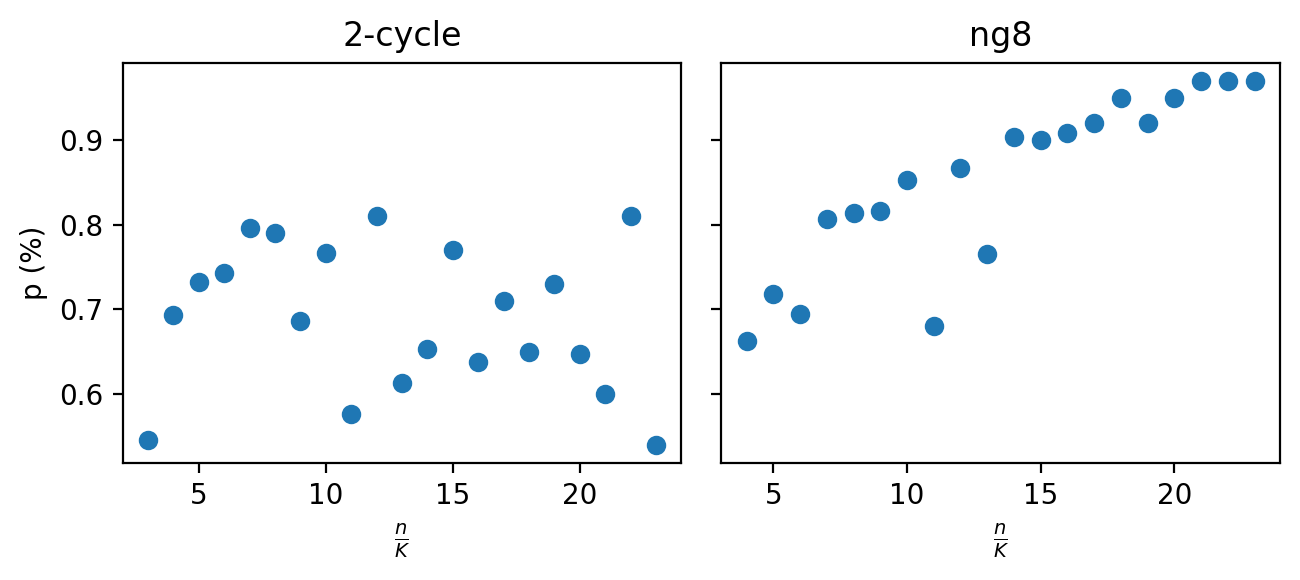

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax1.scatter(table.index,table['cyc2',"%c"])
ax1.set_title(r"2-cycle")
ax1.set_xlabel(r"$\frac {n} {K}$")
ax2.scatter(table.index,table['ng8',"%c"])
ax2.set_title(r"ng8")
ax2.set_xlabel(r"$\frac {n} {K}$")
ax1.set_ylabel(r"p (%)")
plt.tight_layout()
# plt.savefig("plots/percentage_flexibility.pgf")
plt.show()

SpearmanrResult(correlation=0.7360058864623749, pvalue=0.9999999860418316)
SpearmanrResult(correlation=-0.14806400058039795, pvalue=0.11410445899218453)
SpearmanrResult(correlation=0.7229957335381246, pvalue=0.9999999781859789)
SpearmanrResult(correlation=0.9257626006203393, pvalue=1.0)


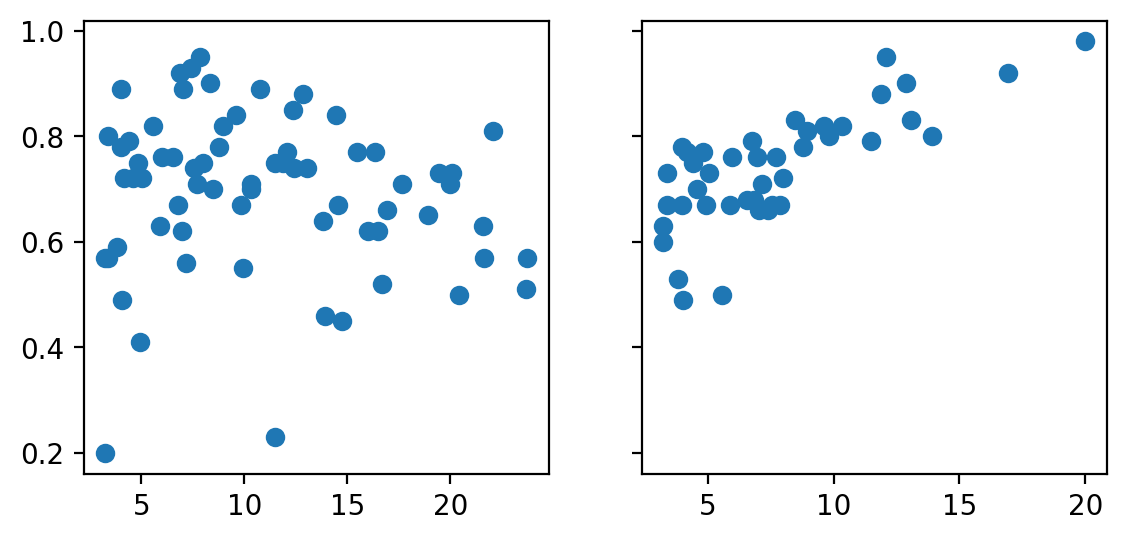

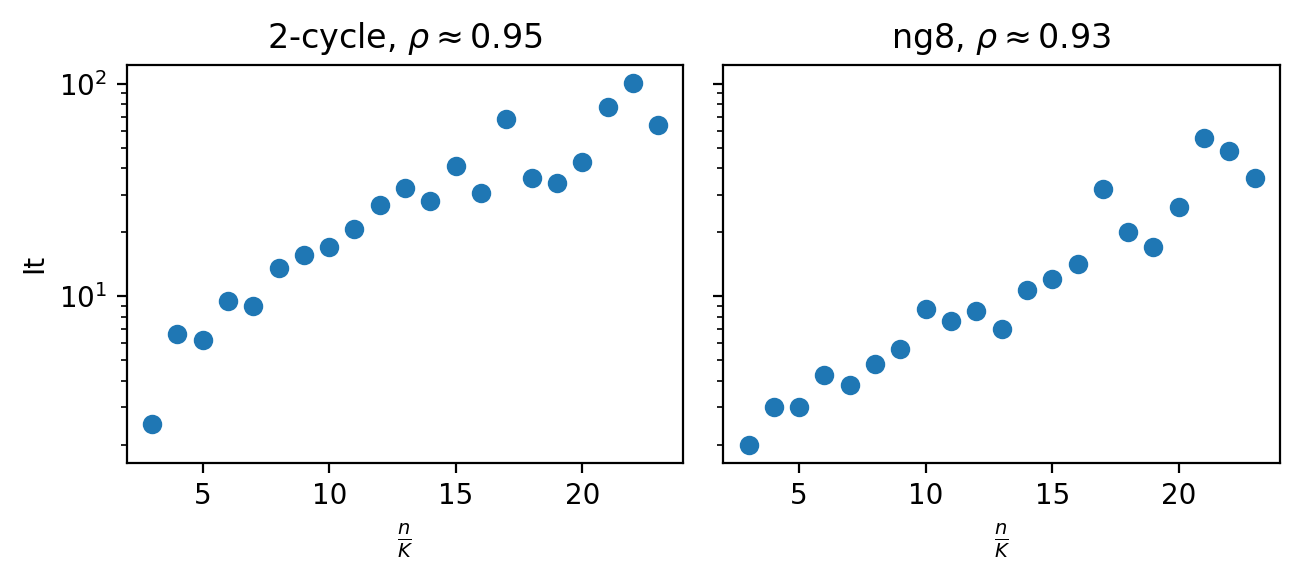

In [87]:
# Die Streuung scheint unterschiedlich groß zu sein! Bei n8 etwas kleiner, ber cyc2 deutlich größer
subset1 = data[data.method == "ng8"]
subset2 = data[data.method == "cyc2"]

print(stats.spearmanr(subset1[["n/K",'%c']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset2[["n/K",'%c']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset1[["n/K",'Ic']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))
print(stats.spearmanr(subset2[["n/K",'Ic']].to_numpy(),axis=0, nan_policy="omit",alternative="less"))

# fig, axs = plt.subplots(2, 2,sharey=True,figsize=(6.6,6),dpi=200)
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax2.scatter(subset1["n/K"],subset1["%c"])
ax1.scatter(subset2["n/K"],subset2["%c"])
plt.show()
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(6.6,3),dpi=200)
ax1.scatter(table.index,table['cyc2',"Ic"])
ax1.set_yscale("log")
ax1.set_title(r"2-cycle, $\rho \approx 0.95$")
ax1.set_xlabel(r"$\frac {n} {K}$")
ax1.set_ylabel("It")
ax2.set_title(r"ng8, $\rho \approx 0.93$")
ax2.scatter(table.index,table['ng8',"Ic"])
ax2.set_xlabel(r"$\frac {n} {K}$")
plt.tight_layout()
# plt.savefig("plots/it_flexibility.pgf")
# plt.show()
# Das ganze scheint ebenso für cyc2 und % zu gelten.
# Aber nicht für ng20!